# Lending Club loan data

El presente proyecto tiene como objetivo probar diferentes modelos de aprendizaje automático para determinar si un cliente tendrá problemas con el pago de su deuda o no,  de acuerdo a diversas características como el riesgo o incumplimiento por parte del prestatario a lo largo de los años.

https://www.kaggle.com/wordsforthewise/lending-club

In [1]:
import io
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 1000

In [2]:
%ls

accepted_2007_to_2018Q4.csv.gz  LCDataDictionary-esp.xlsx
data_acc_200k.csv               sample_data/


# **Procesamiento de la data inicial**

In [ ]:
data_acc = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
data_acc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_acc.shape

(2260701, 151)

In [ ]:
data_acc['loan_status'].value_counts() 

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
data_acc['loan_status'].value_counts() / data_acc.shape[0] * 100

Fully Paid                                             47.629076
Current                                                38.851533
Charged Off                                            11.879457
Late (31-120 days)                                      0.949573
In Grace Period                                         0.373159
Late (16-30 days)                                       0.192374
Does not meet the credit policy. Status:Fully Paid      0.087937
Does not meet the credit policy. Status:Charged Off     0.033662
Default                                                 0.001769
Name: loan_status, dtype: float64

In [ ]:
# "Fully Paid" y "Current" son clientes que estan cumpliendo con sus pagos a tiempo o q ya terminaron de cancelar 
# "Charged Off" no pagada
# Los siguientes valores tienen ruido por guardar hacer overload al dato:
    # "Does not meet the credit policy. Status:Fully Paid" == Fully Paid 
    # "Does not meet the credit policy. Status:Charged Off" == Charged Off 
# No considerar el campo "Default"

In [ ]:
data_dictionary = pd.read_excel("LCDataDictionary-esp.xlsx")

In [ ]:
data_dictionary

,LoanStatNuevo,Descripción
0,acc_now_delinq,El número de cuentas en las que el prestatario...
1,acc_open_past_24mths,Número de operaciones abiertas en los últimos ...
2,addr_state,El estado proporcionado por el prestatario en ...
3,all_util,Saldo al límite de crédito en todas las operac...
4,annual_inc,El ingreso anual autoinformado proporcionado p...
5,annual_inc_joint,El ingreso anual autoinformado combinado propo...
6,application_type,Indica si el préstamo es una solicitud individ...
7,avg_cur_bal,Saldo actual promedio de todas las cuentas
8,bc_open_to_buy,Total abierto para comprar con tarjetas bancar...
9,bc_util,Relación entre el saldo actual total y el lími...


In [ ]:
for i in data_dictionary.values:
    if str(i[0]) == 'loan_status':
        print(str(i[0]) + ':: \n\t ' + str(i[1]))
        print()

loan_status:: 
	 Estado actual del préstamo



In [ ]:
data_acc_200k = data_acc.sample(frac=0.1, axis=0, random_state=42).reset_index(drop=True)

In [ ]:
data_acc_200k.shape

(226070, 151)

In [ ]:
data_acc_200k['loan_status'].value_counts() 

Fully Paid                                             107427
Current                                                 87960
Charged Off                                             26875
Late (31-120 days)                                       2256
In Grace Period                                           850
Late (16-30 days)                                         451
Does not meet the credit policy. Status:Fully Paid        173
Does not meet the credit policy. Status:Charged Off        70
Default                                                     4
Name: loan_status, dtype: int64

In [ ]:
data_acc_200k['loan_status'].value_counts() / data_acc_200k.shape[0] * 100

Fully Paid                                             47.519352
Current                                                38.908303
Charged Off                                            11.887911
Late (31-120 days)                                      0.997921
In Grace Period                                         0.375990
Late (16-30 days)                                       0.199496
Does not meet the credit policy. Status:Fully Paid      0.076525
Does not meet the credit policy. Status:Charged Off     0.030964
Default                                                 0.001769
Name: loan_status, dtype: float64

In [ ]:
# En el subconjunto de dato se mantiene la relación de los totales de cada clase
data_acc_200k.head(2).T

,0,1
id,39651438,16411620
member_id,NaN,NaN
loan_amnt,32000,9600
funded_amnt,32000,9600
funded_amnt_inv,32000,9600
term,60 months,36 months
int_rate,10.49,12.99
installment,687.65,323.42
grade,B,C
sub_grade,B3,C1


In [ ]:
data_acc_200k.to_csv("data_acc_200k.csv")

In [56]:
loans = pd.read_csv('data_acc_200k.csv', low_memory=False)
loans.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,10+ years,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,NaN,NaN,20.0,0.0,39687.0,57.8,42.0,w,7181.91,...,556496.0,103647.0,64100.0,72197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,NaN,RENT,21900.0,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,NaN,118.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,...,11600.0,4509.0,2400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,4 years,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,NaN,NaN,16.0,0.0,1564.0,17.2,25.0,w,0.00,...,222616.0,64253.0,5600.0,76154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,10+ years,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,15.0,NaN,11.0,0.0,2706.0,12.8,25.0,w,0.00,...,32227.0,5559.0,11000.0,11127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,10+ years,OWN,65000.0,Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,926xx,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,37.0,NaN,19.0,0.0,49461.0,24.7,33.0,w,21954.14,...,257219.0,97647.0,179400.0,65719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data=loans

In [58]:
loans.shape

(226070, 152)

# **Estadistica descriptiva**

In [ ]:
loans.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=152)

In [ ]:
loans['loan_status'].value_counts()

Fully Paid                                             107427
Current                                                 87960
Charged Off                                             26875
Late (31-120 days)                                       2256
In Grace Period                                           850
Late (16-30 days)                                         451
Does not meet the credit policy. Status:Fully Paid        173
Does not meet the credit policy. Status:Charged Off        70
Default                                                     4
Name: loan_status, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loan Amount Distribution')

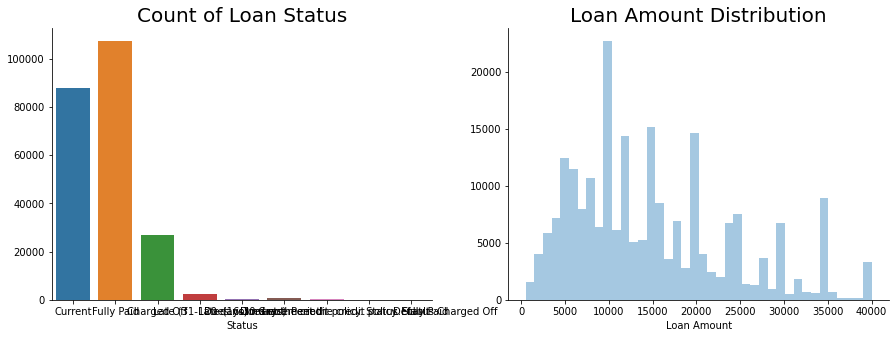

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=loans, ax=axes[0])
sns.distplot(loans['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

Text(0.5, 1.0, 'Boxplot between Loan Amount and Loan Status')

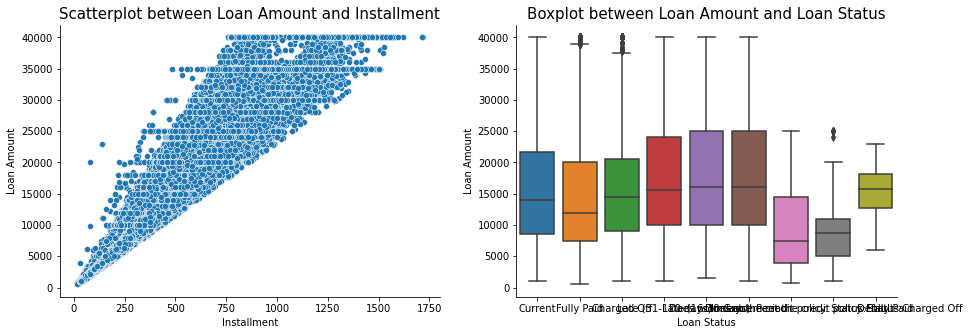

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='installment', y='loan_amnt', data=loans, ax=axes[0])
sns.boxplot(x='loan_status', y='loan_amnt', data=loans, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Scatterplot between Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Boxplot between Loan Amount and Loan Status', size=15)

In [ ]:
loans = loans.drop(loans.loc[:, loans.isna().mean().sort_values() > 0.3].columns, axis=1)
loans.shape

(226070, 94)

In [ ]:
loans['dti']

0         24.05
1         10.03
2         19.53
3          9.16
4         36.26
          ...  
226065    35.88
226066    11.21
226067    25.93
226068    17.06
226069     7.01
Name: dti, Length: 226070, dtype: float64

Text(0.5, 1.0, 'Normal Distribution Histogram')

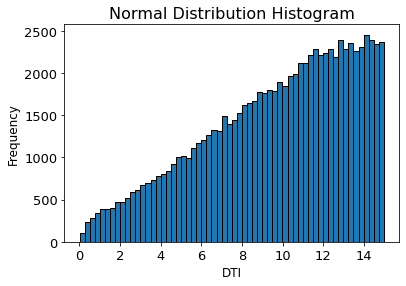

In [ ]:
import matplotlib.pyplot as plt
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 15)]
plt.hist(var['dti'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.xlabel('DTI',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Normal Distribution Histogram',fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

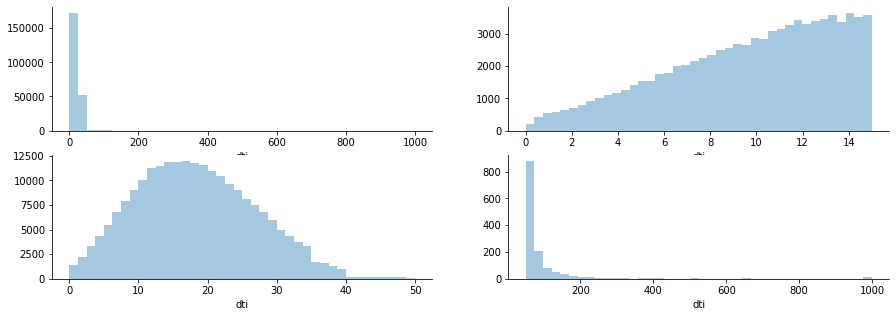

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15,5))
sns.distplot(loans['dti'], kde=False, bins=40, ax=axes[0][0])
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 15)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[0][1])
var=loans.loc[(loans['dti'] > 0) & (loans['dti'] < 50)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[1][0])
var=loans.loc[(loans['dti'] > 50) & (loans['dti'] < 9999)]
sns.distplot(var['dti'], kde=False, bins=40, ax=axes[1][1])
sns.despine()

In [ ]:
loans['loan_amnt'].value_counts()

10000.0    18605
20000.0    13269
15000.0    12276
12000.0    12208
35000.0     8660
           ...  
37125.0        1
33675.0        1
37850.0        1
36925.0        1
32775.0        1
Name: loan_amnt, Length: 1507, dtype: int64

In [ ]:
loans['term'].value_counts()

 36 months    160800
 60 months     65266
Name: term, dtype: int64

Text(15.835887896825405, 0.5, 'loan_amnt')

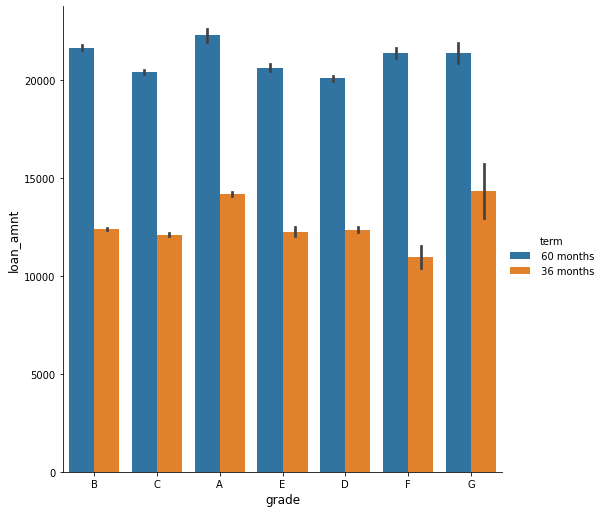

In [ ]:
sns.catplot(x="grade", y="loan_amnt", hue="term", kind="bar", data=loans,height = 7, aspect = 1)
plt.xlabel("grade",fontsize=12)
plt.ylabel("loan_amnt",fontsize=12)

Text(1.6424479166666615, 0.5, '')

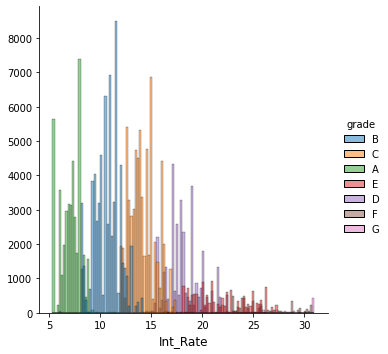

In [ ]:
#f, axe = plt.subplots(figsize=(10,6))
b=sns.displot(loans, x="int_rate", hue="grade", height = 5, aspect = 1, kde=False)
plt.xlabel("Int_Rate",fontsize=12)
plt.ylabel("",fontsize=12)
#plt.title('Distribución de la tasa de interés cobrada por cada grado del préstamo',fontsize=16)

In [ ]:
loans['application_type'].value_counts()

Individual    213960
Joint App      12106
Name: application_type, dtype: int64

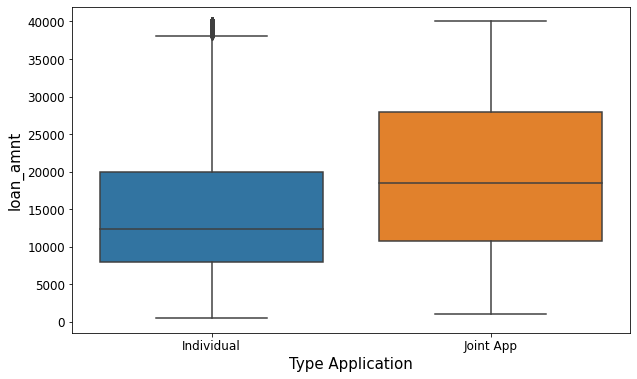

In [ ]:
f, axe = plt.subplots(figsize=(10,6))
b=sns.boxplot(x='application_type', y='loan_amnt', data=loans,ax=axe)
b.set_xlabel("Type Application",fontsize=15)
b.set_ylabel("loan_amnt",fontsize=15)
b.tick_params(labelsize=12)

In [ ]:
loans.loc[loans['loan_status']=='Does not meet the credit policy. Status:Charged Off','loan_status']='DMCP: Charged Off'
loans.loc[loans['loan_status']=='Does not meet the credit policy. Status:Fully Paid','loan_status']='DMCP:Fully Paid'

In [ ]:
loans['loan_status'].value_counts()

Fully Paid            107427
Current                87960
Charged Off            26875
Late (31-120 days)      2256
In Grace Period          850
Late (16-30 days)        451
DMCP:Fully Paid          173
DMCP: Charged Off         70
Default                    4
Name: loan_status, dtype: int64

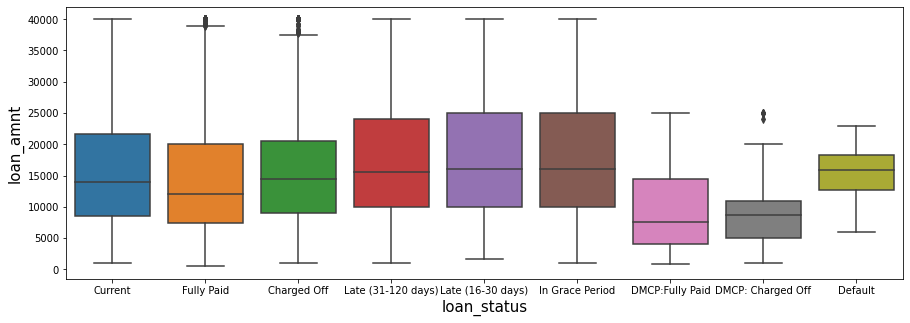

In [ ]:
#tips = sns.load_dataset("tips")
f, axes = plt.subplots(1, 1, figsize=(15,5))
b = sns.boxplot(x='loan_status', y='loan_amnt', data=loans, ax=axes)
b.set_xlabel("loan_status",fontsize=15)
b.set_ylabel("loan_amnt",fontsize=15)
b.tick_params(labelsize=10)

[Text(0, 0.5, ''), Text(0.5, 0, 'Loan Status')]

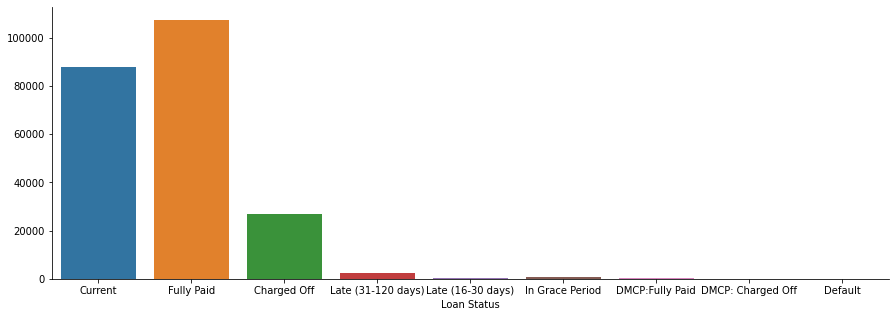

In [ ]:
f, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='loan_status', data=loans, ax=axes)
sns.despine()
axes.set(xlabel='Loan Status', ylabel='')
#axes.set_title('Count of Loan Status', size=20)

[Text(0, 0.5, ''), Text(0.5, 0, 'grade')]

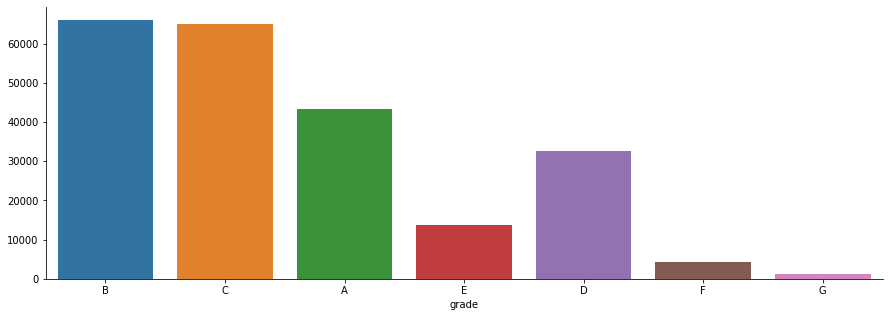

In [ ]:
f, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='grade', data=loans, ax=axes)
sns.despine()
axes.set(xlabel='grade', ylabel='')
#axes.set_title('Count of Loan Status', size=20)

# **Preprocesamiento de los datos**

In [59]:
(data.isnull().sum() / data.shape[0] *100)

Unnamed: 0                                      0.000000
id                                              0.000000
member_id                                     100.000000
loan_amnt                                       0.001769
funded_amnt                                     0.001769
funded_amnt_inv                                 0.001769
term                                            0.001769
int_rate                                        0.001769
installment                                     0.001769
grade                                           0.001769
sub_grade                                       0.001769
emp_title                                       7.361879
emp_length                                      6.457734
home_ownership                                  0.001769
annual_inc                                      0.001769
verification_status                             0.001769
issue_d                                         0.001769
loan_status                    

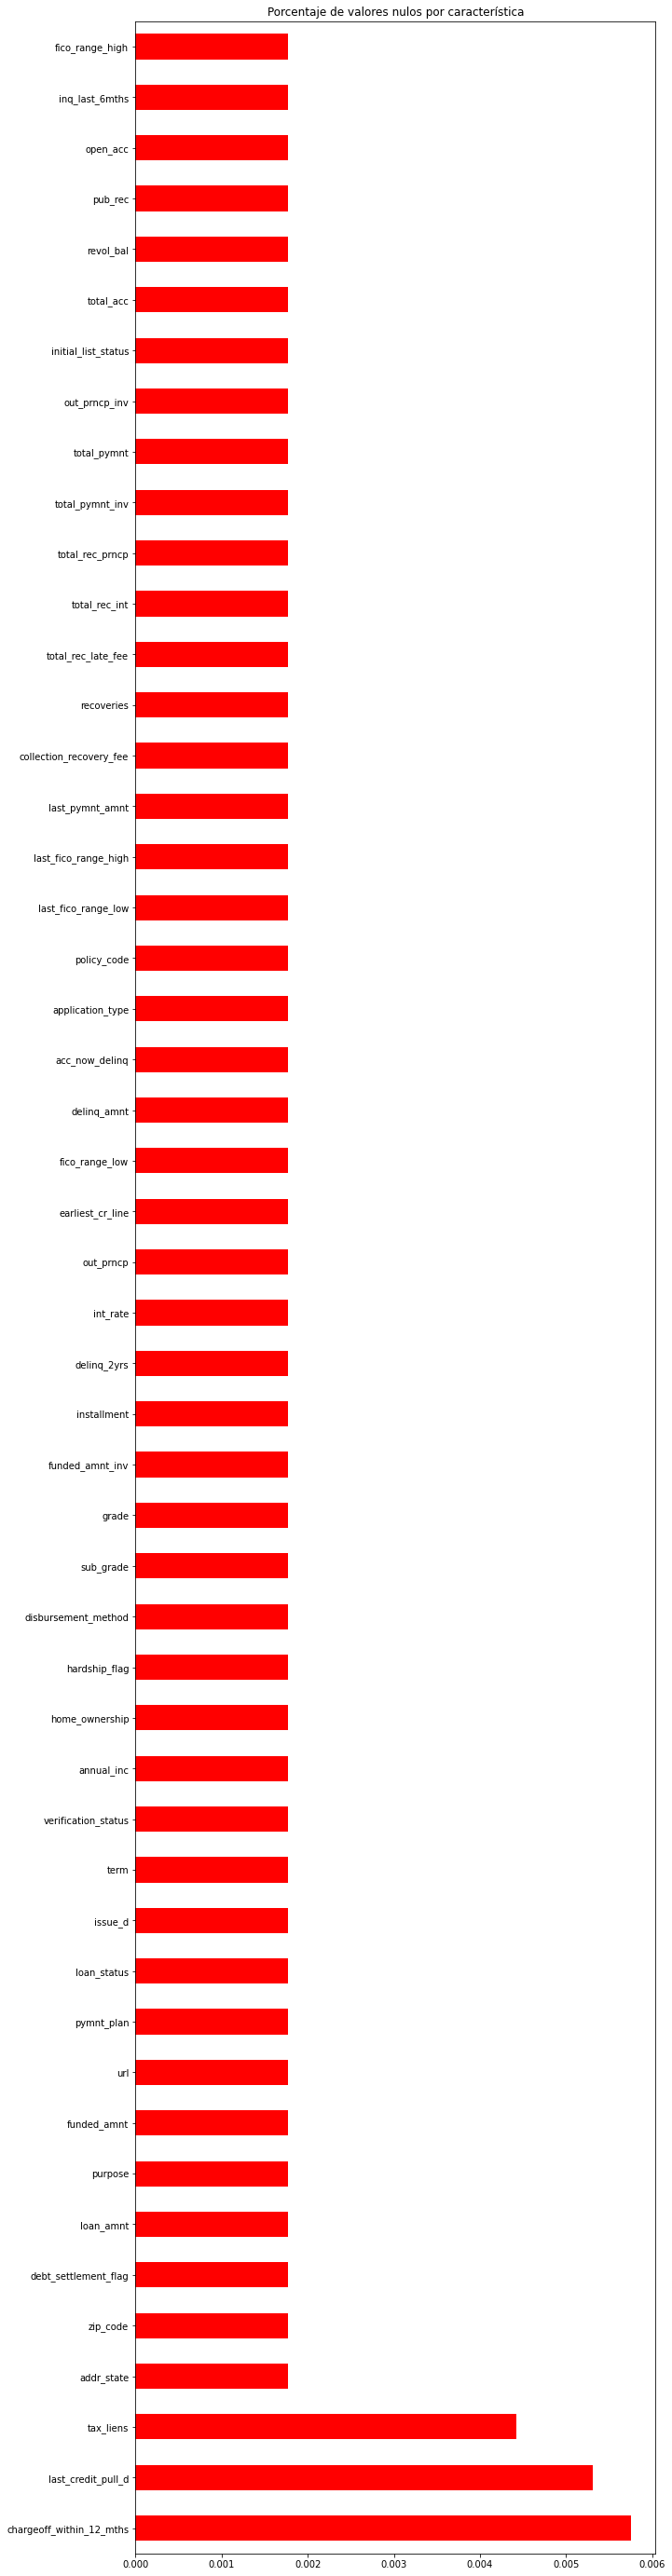

In [7]:
plt.figure(figsize=(10,50))
((data.isnull().sum())/len(data)*100).sort_values(ascending=False)[100:150].plot.barh(title='Porcentaje de valores nulos por característica', color='red')

In [60]:
a = ((data.isnull().sum())/len(data)*100).sort_values()

In [61]:
data2 = data.drop(data.loc[:, data.isna().mean().sort_values() > 0.3].columns, axis=1)

In [10]:
(data2.columns)

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_pa

In [62]:
len(data.loc[:, data.isna().mean().sort_values() > 0.3].columns)

58

In [12]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=152)

In [13]:
data2.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,39651438,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,10+ years,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,...,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,1,16411620,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,NaN,RENT,21900.0,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,0.00,11643.969042,11643.97,9600.00,...,4509.0,11600.0,6.0,347.0,871.0,63.7,0.0,0.0,97.0,157.0,1.0,1.0,0.0,26.0,1.0,0.0,2.0,5.0,2.0,5.0,2.0,13.0,18.0,5.0,13.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,2,45122316,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,4 years,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,16.0,0.0,1564.0,17.2,25.0,w,0.00,0.00,4368.842365,4368.84,4000.00,...,196017.0,9100.0,2.0,12251.0,5514.0,1.5,0.0,0.0,139.0,72.0,12.0,10.0,2.0,12.0,NaN,0.0,1.0,2.0,3.0,8.0,14.0,4.0,9.0,2.0,16.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,3,125356772,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,10+ years,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,...,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,4,128490686,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,10+ years,OWN,65000.0,Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,926xx,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,9697.160000,9697.16,3045.86,...,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N


In [14]:
data2.nunique() / len(data2) * 100

Unnamed: 0                    100.000000
id                            100.000000
loan_amnt                       0.666608
funded_amnt                     0.666608
funded_amnt_inv                 1.068696
term                            0.000885
int_rate                        0.267616
installment                    18.907860
grade                           0.003096
sub_grade                       0.015482
emp_title                      36.006989
emp_length                      0.004866
home_ownership                  0.002654
annual_inc                      7.483080
verification_status             0.001327
issue_d                         0.061043
loan_status                     0.003981
pymnt_plan                      0.000885
url                            99.998231
purpose                         0.006193
title                           3.860309
zip_code                        0.392799
addr_state                      0.022559
dti                             2.604503
delinq_2yrs     

In [15]:
data2.isna().sum() / len(data2) * 100

Unnamed: 0                     0.000000
id                             0.000000
loan_amnt                      0.001769
funded_amnt                    0.001769
funded_amnt_inv                0.001769
term                           0.001769
int_rate                       0.001769
installment                    0.001769
grade                          0.001769
sub_grade                      0.001769
emp_title                      7.361879
emp_length                     6.457734
home_ownership                 0.001769
annual_inc                     0.001769
verification_status            0.001769
issue_d                        0.001769
loan_status                    0.001769
pymnt_plan                     0.001769
url                            0.001769
purpose                        0.001769
title                          1.018269
zip_code                       0.001769
addr_state                     0.001769
dti                            0.077852
delinq_2yrs                    0.001769


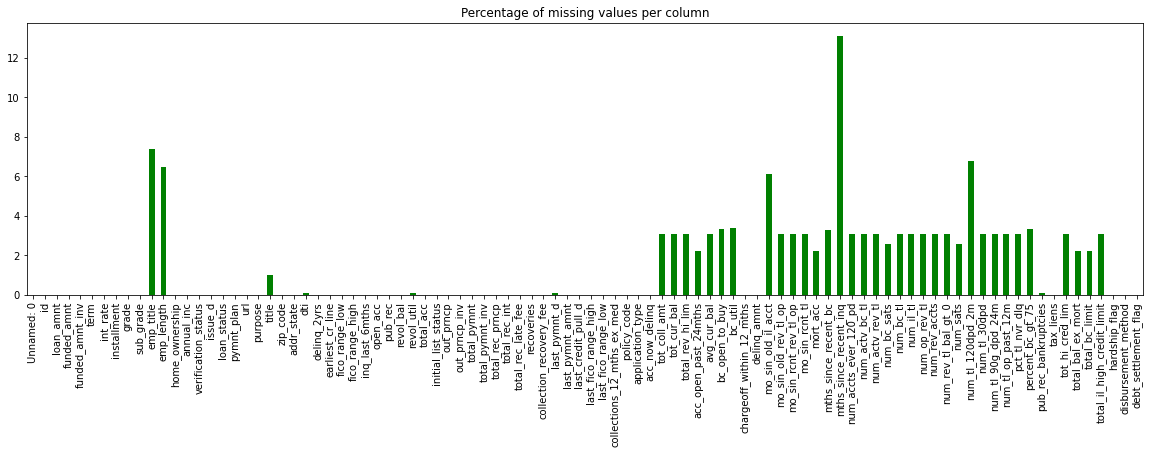

In [16]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

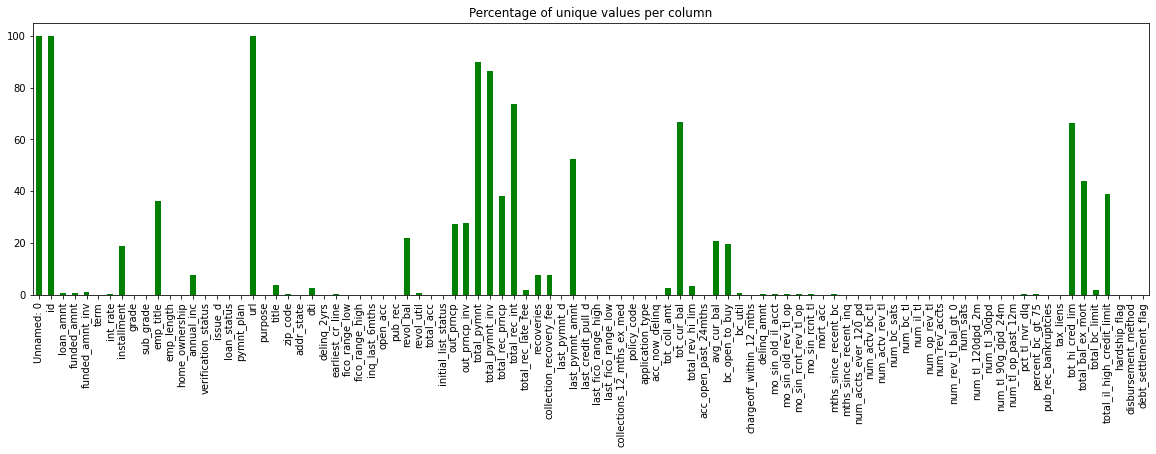

In [17]:
plt.figure(figsize=(20,5))
((data2.nunique() / len(data2)*100)).plot.bar(title='Percentage of unique values per column', color='green')

In [63]:
#Determinamos aquellas variables que tengan un porcentaje de registros únicos por cada variable mayor al valor de 0.7
threshold = 0.66

unique_percentages = data2.nunique() / len(data2)

# en caso se una variable numérica continua, es probable que todos los valores sean únicos (?)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()

In [64]:
len(columns_to_filter)

8

In [65]:
columns_to_filter

Index(['Unnamed: 0', 'id', 'url', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'tot_cur_bal', 'tot_hi_cred_lim'],
      dtype='object')

In [66]:
#Eliminamos las variables seleccionadas en el paso anterior
data2.drop(columns_to_filter, axis=1, inplace=True)

In [67]:
len(data2.columns)

86

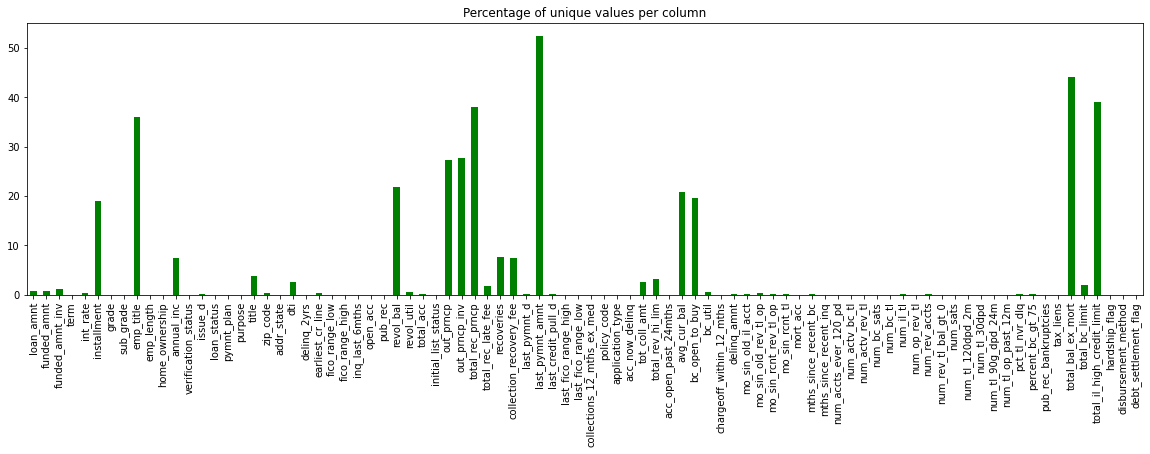

In [23]:
plt.figure(figsize=(20,5))
((data2.nunique() / len(data2)*100)).plot.bar(title='Percentage of unique values per column', color='green')

In [68]:
#Determinamos que variables son del tipo númerico y cuales son categóricas
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in data2:
#Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(data2[column]):
        numeric_columns.append(column)
    else:
        #Modificamos el tipo de dato de la variable mediante "astype"
        data2[column] = data2[column].astype("category")

        #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
        if not pd.api.types.is_categorical_dtype(data2[column]):
            raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

        dictionary_of_columns_with_index_to_categorical[column] = dict()
        dictionary_of_columns_with_categorical_to_index[column] = dict()

        #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
        for index, category in enumerate(data2[column].cat.categories):
            dictionary_of_columns_with_index_to_categorical[column][index] = category
            dictionary_of_columns_with_categorical_to_index[column][category] = index

        categorical_columns.append(column)

In [69]:
len(numeric_columns)

64

In [70]:
len(categorical_columns)

22

In [71]:
#Reemplazamos los nulos con la mediana sólo de aquellas variables numéricas
median_of_numeric_columns = data2[numeric_columns].median()

data2[numeric_columns] = data2[numeric_columns].fillna(median_of_numeric_columns)

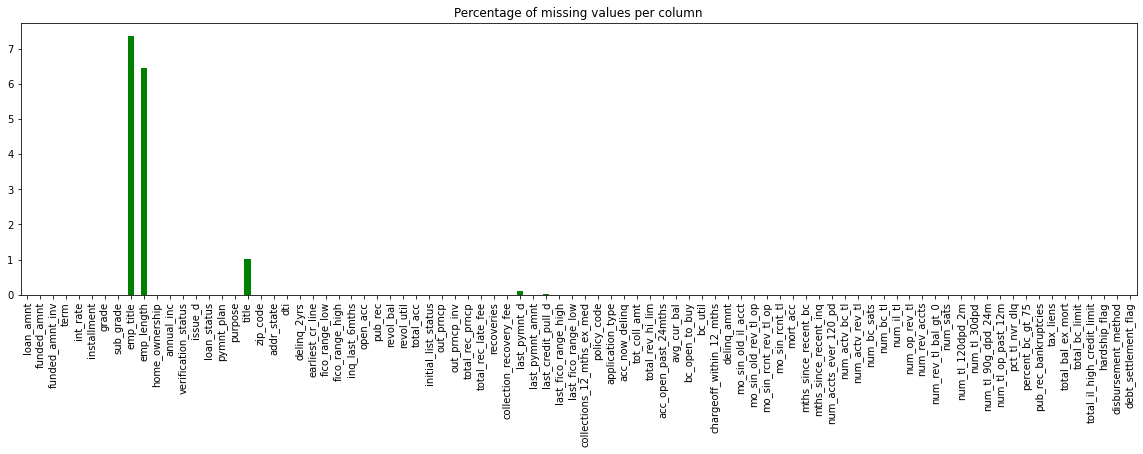

In [28]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [72]:
(data2.isnull().sum())/len(data2)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.001769
int_rate                      0.000000
installment                   0.000000
grade                         0.001769
sub_grade                     0.001769
emp_title                     7.361879
emp_length                    6.457734
home_ownership                0.001769
annual_inc                    0.000000
verification_status           0.001769
issue_d                       0.001769
loan_status                   0.001769
pymnt_plan                    0.001769
purpose                       0.001769
title                         1.018269
zip_code                      0.001769
addr_state                    0.001769
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.001769
fico_range_low                0.000000
fico_range_high               0.000000
inq_last_6mths           

In [73]:
data2[['title', 'purpose']].head(10)

,title,purpose
0,Debt consolidation,debt_consolidation
1,Debt consolidation,debt_consolidation
2,Major purchase,major_purchase
3,Debt consolidation,debt_consolidation
4,Debt consolidation,debt_consolidation
5,Debt consolidation,debt_consolidation
6,Debt consolidation,debt_consolidation
7,Credit card refinancing,credit_card
8,Home buying,house
9,Debt consolidation,debt_consolidation


In [74]:
data2 = data2.drop('title', axis=1)

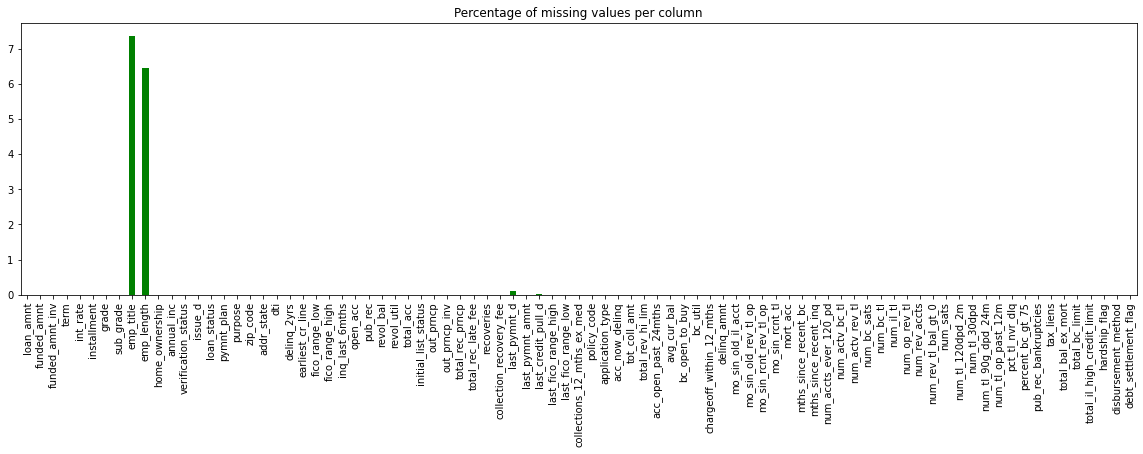

In [32]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [75]:
print(data2['emp_title'].nunique())
data2['emp_title'].value_counts()

81401


Teacher                                3942
Manager                                3417
Owner                                  2095
Registered Nurse                       1543
Driver                                 1487
                                       ... 
Refrigeration Project Manager             1
Refrigeration Foreman                     1
Refrigeration Coordinator                 1
Refrigerant Tech Supervisor               1
 \tOFFICE MANAGER/MEDICAL ASSISTANT       1
Name: emp_title, Length: 81401, dtype: int64

In [76]:
data2 = data2.drop('emp_title',axis=1)

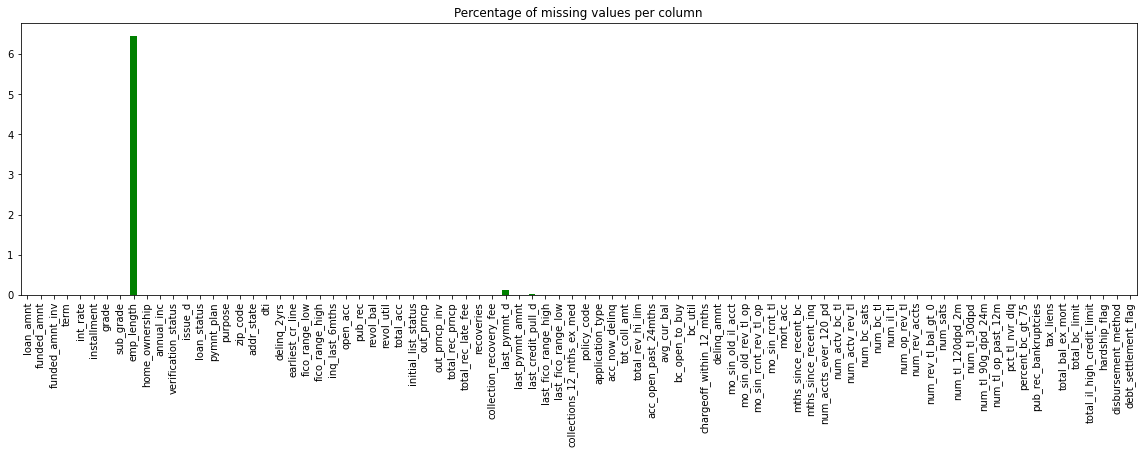

In [35]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [77]:
data2 = data2.drop('emp_length', axis=1)

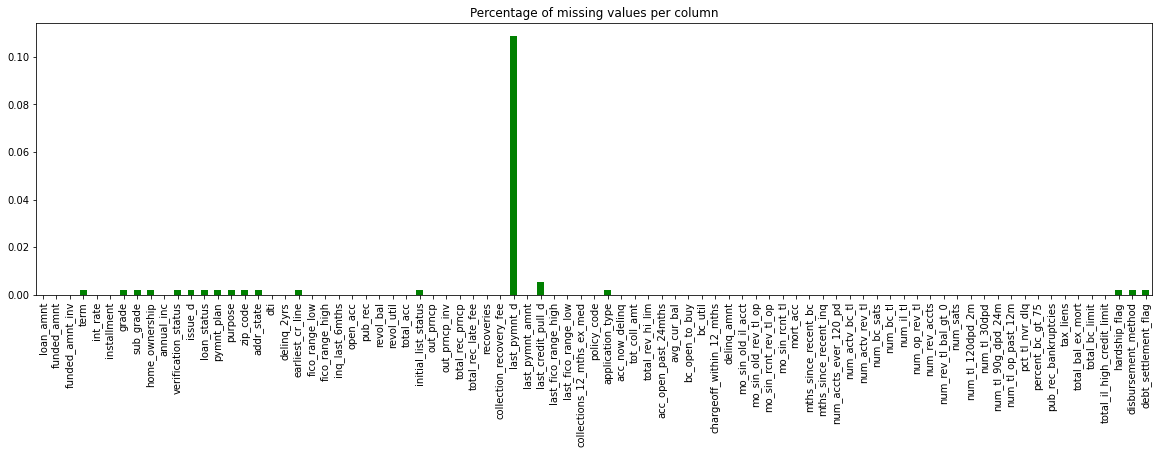

In [37]:
plt.figure(figsize=(20,5))
((data2.isnull().sum())/len(data2)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [78]:
data2 = data2.dropna()

In [79]:
data2.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_re

In [80]:
data.shape

(226070, 152)

In [81]:
data2 = data2.drop('grade', axis=1)

In [82]:
data2.shape

(225816, 82)

In [83]:
dat= (data2.nunique()/data2.shape[0]>0.5) == True
data2 = data2.drop('last_pymnt_amnt', axis=1)

In [84]:
data2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,...,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B3,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,debt_consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,24818.09,0.0,0.0,0.0,Mar-2019,Mar-2019,794.0,790.0,0.0,1.0,...,0.0,0.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,103647.0,64100.0,72197.0,N,Cash,N
1,9600.0,9600.0,9600.0,36 months,12.99,323.42,C1,RENT,21900.0,Verified,May-2014,Fully Paid,n,debt_consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,0.00,9600.00,0.0,0.0,0.0,Jun-2017,Aug-2017,544.0,540.0,0.0,1.0,...,0.0,0.0,11600.0,6.0,347.0,871.0,63.7,0.0,0.0,97.0,157.0,1.0,1.0,0.0,26.0,1.0,0.0,2.0,5.0,2.0,5.0,2.0,13.0,18.0,5.0,13.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,4509.0,2400.0,0.0,N,Cash,N
2,4000.0,4000.0,4000.0,36 months,6.68,122.93,A3,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,major_purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,16.0,0.0,1564.0,17.2,25.0,w,0.00,0.00,4000.00,0.0,0.0,0.0,Mar-2017,Feb-2019,624.0,620.0,0.0,1.0,...,0.0,0.0,9100.0,2.0,12251.0,5514.0,1.5,0.0,0.0,139.0,72.0,12.0,10.0,2.0,12.0,5.0,0.0,1.0,2.0,3.0,8.0,14.0,4.0,9.0,2.0,16.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,64253.0,5600.0,76154.0,N,Cash,N
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B4,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,debt_consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6025.00,0.0,0.0,0.0,Oct-2018,Oct-2018,744.0,740.0,0.0,1.0,...,0.0,0.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,5559.0,11000.0,11127.0,N,Cash,N
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E5,OWN,65000.0,Verified,Feb-2018,Current,n,debt_consolidation,926xx,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,3045.86,0.0,0.0,0.0,Mar-2019,Mar-2019,659.0,655.0,0.0,1.0,...,0.0,0.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,97647.0,179400.0,65719.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226065,10525.0,10525.0,10525.0,36 months,17.14,375.98,D4,RENT,28000.0,Source Verified,Nov-2014,Fully Paid,n,debt_consolidation,960xx,CA,35.88,0.0,Apr-1997,670.0,674.0,0.0,12.0,2.0,8787.0,62.5,18.0,w,0.00,0.00,10525.00,0.

In [85]:
#Juntar las clases de loan_status
#“0”: "Fully Paid", "Current", “In Grace Period” y “Does not meet the credit policy. Status:Fully Paid”
#“1”: "Charged Off", “Late (31-120 days)”, “Late (16-30 days)” y “Does not meet the credit policy. Status:Charged Off”
#Los registros con el valor de “Default” serán descartados.

In [86]:
data2 = data2.drop(data2.loc[data2['loan_status']=="Default"].index, axis=0)

In [87]:
data2['target']=1

In [89]:
data2.loc[(data2['loan_status']=="Fully Paid"), 'target'] = 0
data2.loc[(data2['loan_status']=="Current"), 'target'] = 0
data2.loc[(data2['loan_status']=="In Grace Period"), 'target'] = 0
data2.loc[(data2['loan_status']=="Does not meet the credit policy. Status:Fully Paid"), 'target'] = 0

In [90]:
data2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,...,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,target
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B3,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,debt_consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,24818.09,0.0,0.0,0.0,Mar-2019,Mar-2019,794.0,790.0,0.0,1.0,...,0.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,103647.0,64100.0,72197.0,N,Cash,N,0
1,9600.0,9600.0,9600.0,36 months,12.99,323.42,C1,RENT,21900.0,Verified,May-2014,Fully Paid,n,debt_consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,0.00,9600.00,0.0,0.0,0.0,Jun-2017,Aug-2017,544.0,540.0,0.0,1.0,...,0.0,11600.0,6.0,347.0,871.0,63.7,0.0,0.0,97.0,157.0,1.0,1.0,0.0,26.0,1.0,0.0,2.0,5.0,2.0,5.0,2.0,13.0,18.0,5.0,13.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,4509.0,2400.0,0.0,N,Cash,N,0
2,4000.0,4000.0,4000.0,36 months,6.68,122.93,A3,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,major_purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,16.0,0.0,1564.0,17.2,25.0,w,0.00,0.00,4000.00,0.0,0.0,0.0,Mar-2017,Feb-2019,624.0,620.0,0.0,1.0,...,0.0,9100.0,2.0,12251.0,5514.0,1.5,0.0,0.0,139.0,72.0,12.0,10.0,2.0,12.0,5.0,0.0,1.0,2.0,3.0,8.0,14.0,4.0,9.0,2.0,16.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,64253.0,5600.0,76154.0,N,Cash,N,0
3,6025.0,6025.0,6025.0,36 months,10.91,197.00,B4,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,debt_consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6025.00,0.0,0.0,0.0,Oct-2018,Oct-2018,744.0,740.0,0.0,1.0,...,0.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,5559.0,11000.0,11127.0,N,Cash,N,0
4,25000.0,25000.0,25000.0,60 months,26.30,752.96,E5,OWN,65000.0,Verified,Feb-2018,Current,n,debt_consolidation,926xx,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,3045.86,0.0,0.0,0.0,Mar-2019,Mar-2019,659.0,655.0,0.0,1.0,...,0.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,97647.0,179400.0,65719.0,N,Cash,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226065,10525.0,10525.0,10525.0,36 months,17.14,375.98,D4,RENT,28000.0,Source Verified,Nov-2014,Fully Paid,n,debt_consolidation,960xx,CA,35.88,0.0,Apr-1997,670.0,674.0,0.0,12.0,2.0,8787.0,62.5,18.0,w,0.00,0.00,10525.00,0.0,0.0,0.0,Dec-2017

In [91]:
data2 = data2.drop('loan_status', axis=1)

In [92]:
data2.dtypes
lista=list()
for i in data2.columns:
  if  (data2[i].dtypes!=float) & (data2[i].dtypes!=int):
    lista.append(i)
lista
#categoricos todos los que contegan letras, true y false tambien serían categoricos
data3 = pd.get_dummies(data2, columns=lista)

In [93]:
data3

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,...,last_credit_pull_d_Nov-2009,last_credit_pull_d_Nov-2010,last_credit_pull_d_Nov-2011,last_credit_pull_d_Nov-2012,last_credit_pull_d_Nov-2013,last_credit_pull_d_Nov-2014,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Oct-2008,last_credit_pull_d_Oct-2009,last_credit_pull_d_Oct-2010,last_credit_pull_d_Oct-2011,last_credit_pull_d_Oct-2012,last_credit_pull_d_Oct-2013,last_credit_pull_d_Oct-2014,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Sep-2008,last_credit_pull_d_Sep-2009,last_credit_pull_d_Sep-2010,last_credit_pull_d_Sep-2011,last_credit_pull_d_Sep-2012,last_credit_pull_d_Sep-2013,last_credit_pull_d_Sep-2014,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
0,32000.0,32000.0,32000.0,10.49,687.65,120000.0,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,7181.91,7181.91,24818.09,0.0,0.0,0.0,794.0,790.0,0.0,1.0,0.0,0.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,9600.0,9600.0,9600.0,12.99,323.42,21900.0,10.03,0.0,685.0,689.0,1.0,13.0,1.0,4509.0,38.9,20.0,0.00,0.00,9600.00,0.0,0.0,0.0,544.0,540.0,0.0,1.0,0.0,0.0,11600.0,6.0,347.0,871.0,63.7,0.0,0.0,97.0,157.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,4000.0,4000.0,4000.0,6.68,122.93,83000.0,19.53,0.0,780.0,784.0,0.0,16.0,0.0,1564.0,17.2,25.0,0.00,0.00,4000.00,0.0,0.0,0.0,624.0,620.0,0.0,1.0,0.0,0.0,9100.0,2.0,12251.0,5514.0,1.5,0.0,0.0,139.0,72.0,12.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
3,6025.0,6025.0,6025.0,10.91,197.00,52000.0,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,0.00,0.00,6025.00,0.0,0.0,0.0,744.0,740.0,0.0,1.0,0.0,0.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,25000.0,25000.0,25000.0,26.30,752.96,65000.0,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,21954.14,21954.14,3045.86,0.0,0.0,0.0,659.0,655.0,0.0,1.0,0.0,0.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226065,10525.0,10525.0,10525.0,17.14,375.98,28000.0,35.88,0.0,670.0,674.0,0.0,12.0,2.0,8787.0,62.5,18.0,0.00,0.00,10525.00,0.0,0.0,0.0,694.0,690.0,0.0,1.0,0.0,52.0,12600.0,5.0,2228.0,586.0,87.5,0.0,0.0,130.0,210.0,8.0,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
226066,11500.0,11500.0,11500.0,19.05,421.84,35000.0,11.21,1.0,665.0,669.0,2.0,14.0,0.0,5790.0,70.6,29.0,0.00,0.00,11500.00,0.0,0.0,0.0,734.0,730.0,0.0,1.0,0.0,0.0,8

## **Conjunto de entrenamiento y validación**

In [ ]:
from sklearn.model_selection import train_test_split

X_loans = loans.drop('loan_status', axis=1)
Y_loans = loans['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X_loans, Y_loans, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(180856, 151)

In [ ]:
X_val.shape

(45214, 151)

# **Implementación de los modelos**

# Regresión Logística

# Support Vector Machines

# Redes Neuronales

# Gradient Boosting

# Bagging

# Apilamiento